In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_exploded = df.explode('job_skills')

In [3]:
df_jobs = df_exploded[df_exploded['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer'])]

In [4]:
df_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,spark,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,hadoop,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


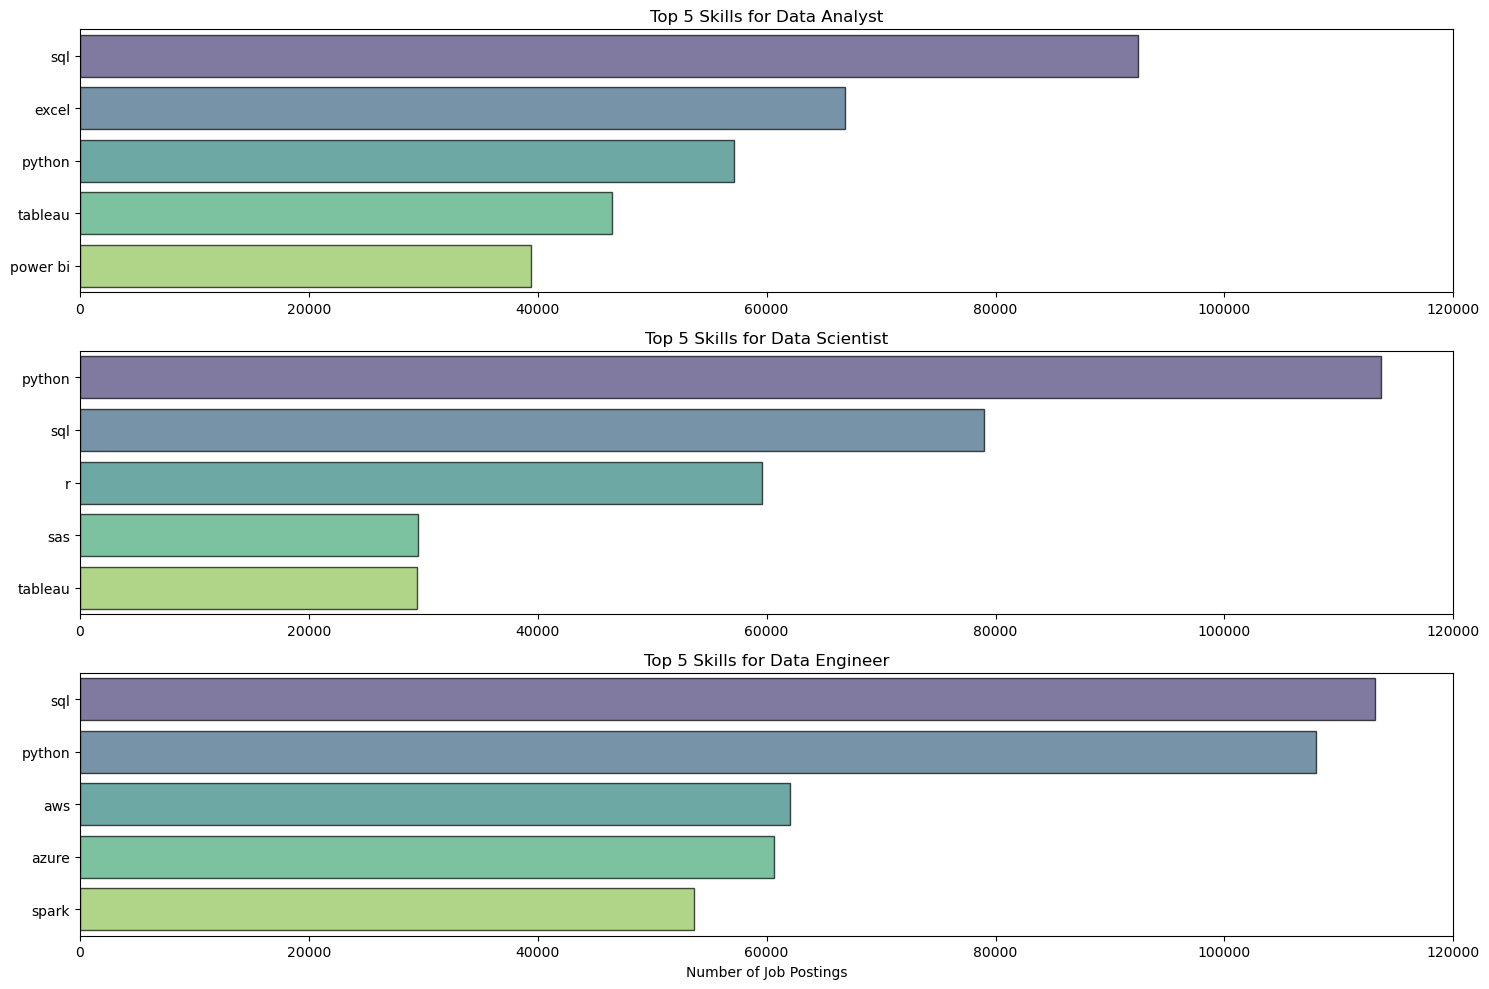

In [ ]:
# Improved percentage-based plot with annotations and better styling
import matplotlib.ticker as mtick
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
for i, job_title in enumerate(job_titles):
    # total number of postings for this job title (from original df)
    total_posts = df[df['job_title_short'] == job_title].shape[0]
    job_data = df_jobs[df_jobs['job_title_short'] == job_title]
    top_skills_counts = job_data['job_skills'].value_counts().head(5)
    # convert to percentage of postings
    top_skills_pct = (top_skills_counts / total_posts) * 100
    top_skills_pct = top_skills_pct.sort_values()

    palette = sns.color_palette('viridis', len(top_skills_pct))
    sns.barplot(x=top_skills_pct.values, y=top_skills_pct.index, palette=palette, ax=ax[i], orient='h', edgecolor='black')

    ax[i].set_title(f'Top 5 Skills for {job_title}', fontsize=14, weight='bold')
    ax[i].set_xlabel('Percentage of Postings (%)')
    ax[i].set_xlim(0, max(top_skills_pct.values) * 1.15)
    ax[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.1f}%"))
    ax[i].set_ylabel('')

    # Add value labels to bars
    x_max = ax[i].get_xlim()[1]
    for p in ax[i].patches:
        width = p.get_width()
        ax[i].text(width + x_max * 0.01, p.get_y() + p.get_height() / 2,
                   f'{width:.1f}%', va='center', fontsize=11)

# Overall title and layout
plt.suptitle('Top 5 Skills by Job Title (Percentage of Postings)', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()